In [4]:
# Importing the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Load the MNIST dataset (for handwritten digits)
mnist = tf.keras.datasets.mnist

In [6]:
# Splitting dataset into training and testing sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Normalize the dataset (scaling pixel values to range 0-1)
x_train = x_train / 255.0
x_test = x_test / 255.0

In [8]:
# Building the model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flattening the 28x28 images into a 1D array of 784
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    layers.Dropout(0.2),                   # Dropout to prevent overfitting
    layers.Dense(10, activation='softmax') # Output layer for 10 digits (0-9)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [9]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
# Training the model
model.fit(x_train, y_train, epochs=5)

# Evaluating the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8620 - loss: 0.4773
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9538 - loss: 0.1559
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9671 - loss: 0.1093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9734 - loss: 0.0877
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0749
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9729 - loss: 0.0883


In [11]:
print('\nTest accuracy:', test_acc)


Test accuracy: 0.9771999716758728


In [12]:
# Visualizing some predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [15]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):2.0f}%)", color=color)

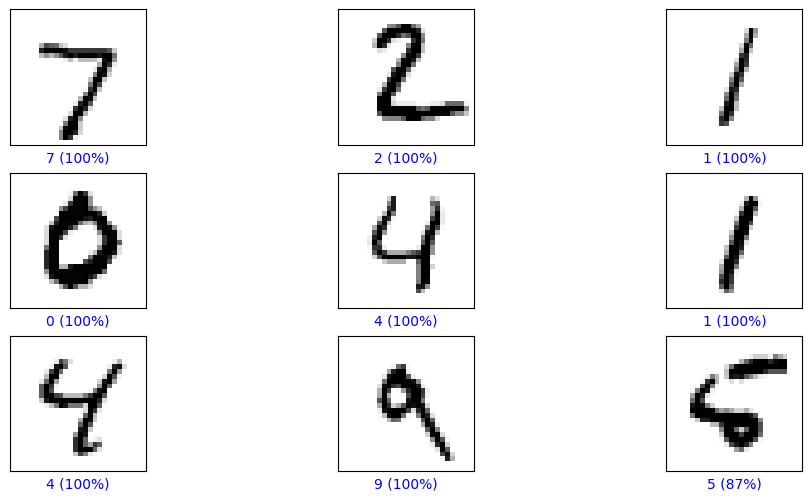

In [16]:
# Plot some test images with predicted labels
num_rows, num_cols = 3, 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, y_test, x_test)
plt.show()